**IMPORTAÇÕES**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
train_df = pd.read_csv('train.csv')

**PRIMEIRO CONTATO COM ARQUIVO E ANALISE EXPLORATÓRIA**

In [106]:
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       2   
1            2         1       0   
2            3         1       2   
3            4         1       0   
4            5         0       2   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         2  
1          PC 17599  71.2833   C85         0  
2  STON/O2. 3101282   7.9250   NaN         2  
3            113803  53.1000  C123         2  
4            373450   8.0500   NaN         2  


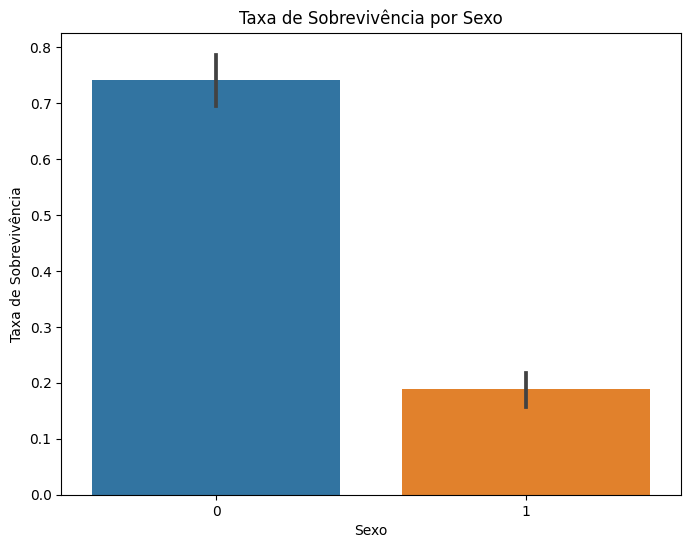

In [68]:
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x='Sex', y='Survived')
plt.xlabel('Sexo')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Sexo')
plt.show()


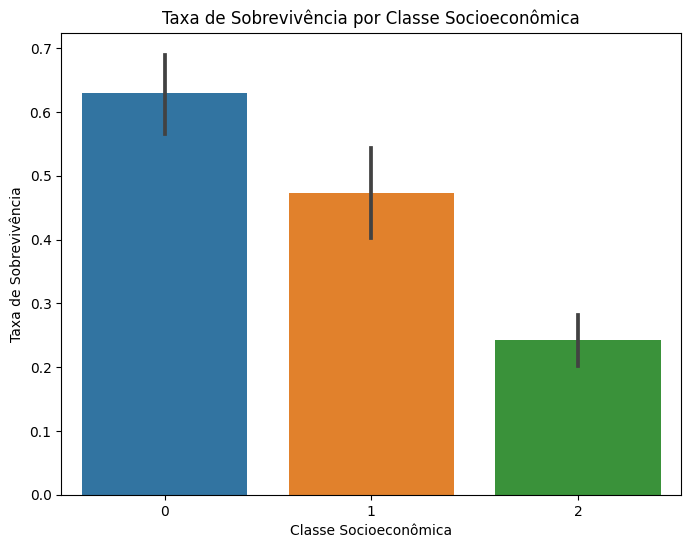

In [69]:
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x='Pclass', y='Survived')
plt.xlabel('Classe Socioeconômica')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Classe Socioeconômica')
plt.show()

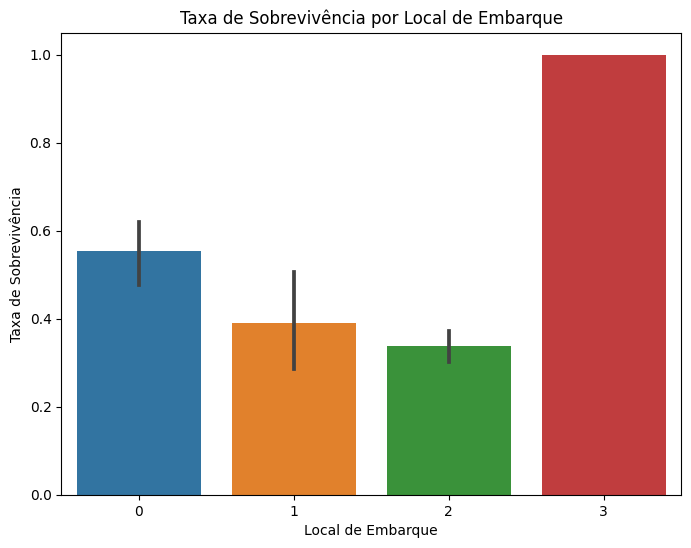

In [70]:
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x='Embarked', y='Survived')
plt.xlabel('Local de Embarque')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Local de Embarque')
plt.show()

**MÉDIA E ALGUNS TRATAMENTOS DE DADOS**

In [71]:
mean_age = train_data['Age'].mean()
print("Média de idades:", mean_age)


Média de idades: 29.69911764705882


Media de idades - sobreviventes e não sobreviventes

In [72]:
mean_age_survived = train_df[train_df['Survived'] == 1]['Age'].mean()
mean_age_not_survived = train_df[train_df['Survived'] == 0]['Age'].mean()
print("Média de idades (Sobreviventes):", mean_age_survived)
print("Média de idades (Não Sobreviventes):", mean_age_not_survived)

Média de idades (Sobreviventes): 28.549778121775027
Média de idades (Não Sobreviventes): 30.415099646415943


In [73]:
fare_var = train_df['Fare'].var()
print("Variação da tarifa:", fare_var)

Variação da tarifa: 2469.436845743116


Variação da tarifa - sobreviventes e não sobreviventes

In [74]:
fare_var_survived = train_df[train_df['Survived'] == 1]['Fare'].var()
fare_var_not_survived = train_df[train_df['Survived'] == 0]['Fare'].var()
print("Variação da tarifa (Sobreviventes):", fare_var_survived)
print("Variação da tarifa (Não Sobreviventes):", fare_var_not_survived)

Variação da tarifa (Sobreviventes): 4435.160158368154
Variação da tarifa (Não Sobreviventes): 985.2195092053387


In [75]:
survival_percentage_by_class = train_df.groupby('Pclass')['Survived'].mean() * 100
print("Porcentagem de sobreviventes por classe socioeconômica:")
print(survival_percentage_by_class)

Porcentagem de sobreviventes por classe socioeconômica:
Pclass
0    62.962963
1    47.282609
2    24.236253
Name: Survived, dtype: float64


**CRIADO MODELO DE AMOSTRAGEM ALEATORIO**

In [76]:
features = train_df.drop('Survived', axis=1)
target = train_df['Survived']

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.4, random_state=42)

In [77]:
print("Tamanho do conjunto de treinamento:", len(train_features))
print("Tamanho do conjunto de teste:", len(test_features))

Tamanho do conjunto de treinamento: 534
Tamanho do conjunto de teste: 357


**TRATAMENTO DE DADOS**

In [78]:
mean_age = train_df['Age'].mean()
train_df['Age'].fillna(mean_age, inplace=True)

label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])

mean_fare = train_df['Fare'].mean()
train_df['Fare'].fillna(mean_fare, inplace=True)

In [27]:
train_df['Pclass'] = label_encoder.fit_transform(train_df['Pclass'])

In [36]:
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

In [ ]:
print(train_df.head())

**Dados e resultado/ alvo**

In [92]:
features = ['Sex', 'Age', 'Fare', 'Pclass']
X = train_df[features]
y = train_df['Survived']

**Conjunto de treinamento e test**

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Criar e treinar modelo de regressão**

In [95]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

**Previsões e avaliação do modelo**

In [96]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)

Erro Quadrático Médio (MSE): 0.13721032187197305
Coeficiente de Determinação (R²): 0.4341884268854712


**Modelo de Arvore de decisao e Random Forest; criando e fazendo previsoes no modelo**

Arvore de decisão;

In [97]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

**Avaliação de desempenho**

In [98]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

Random Forest

In [99]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

**Avaliação de desempenho**

In [100]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

**Validações e resultados**

In [101]:
cv_scores = cross_val_score(random_forest, X, y, cv=5)

In [102]:
print("Árvore de Decisão:")
print("Acurácia:", accuracy_dt)
print("Precisão:", precision_dt)
print("Recall:", recall_dt)
print("\nRandom Forest:")
print("Acurácia:", accuracy_rf)
print("Precisão:", precision_rf)
print("Recall:", recall_rf)
print("\nValidação Cruzada (Random Forest):")
print("Pontuações:", cv_scores)
print("Média da pontuação:", cv_scores.mean())

Árvore de Decisão:
Acurácia: 0.7541899441340782
Precisão: 0.6973684210526315
Recall: 0.7162162162162162

Random Forest:
Acurácia: 0.7932960893854749
Precisão: 0.7681159420289855
Recall: 0.7162162162162162

Validação Cruzada (Random Forest):
Pontuações: [0.77094972 0.82022472 0.85393258 0.80898876 0.83146067]
Média da pontuação: 0.8171112924486849


**Carregando o arquivo de test e realizando tratamentos**

In [103]:

test_df = pd.read_csv('test.csv')
test_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)
test_df['Sex'] = test_df['Sex'].map({'female': 1, 'male': 0})
test_df['Pclass'] = test_df['Pclass'] - 1

**Predições**

In [104]:
predictions = random_forest.predict(test_df[features])

**Criando e exibindo df**

In [105]:
df_predictions = pd.DataFrame({'Passageiro': test_df['PassengerId'], 'Sobreviveu': predictions})
print(df_predictions.head())

   Passageiro  Sobreviveu
0         892           1
1         893           0
2         894           1
3         895           1
4         896           0
